# Importar bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# EDA

## Carga de datos y preevaluación de datos

In [2]:
# Cargar dataset de ofertas relámpago en un DataFrame
path = "../Data/ofertas_relampago.csv"
df = pd.read_csv(path)

In [3]:
# Evaluar cantidad de registros y columnas
registros = df.shape[0]
columnas = df.shape[1]
print(f"Cantidad de registros: {registros}\nCantidad de columnas: {columnas}")

Cantidad de registros: 48746
Cantidad de columnas: 13


In [4]:
# Evaluar primeros 3 registros
df.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


In [5]:
# Evaluar columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

**Se observan las columnas con sus distintos tipos de datos, que serán evaluados posteriormente. Además, se encuentran valores nulos en 3 columnas.**

In [6]:
# Evaluar nulos
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

**Las columnas "SOLD_AMOUNT", "SOLD_QUANTITY" y "ORIGIN" contienen nulos.**

In [7]:
# Evaluar estadísticas descriptivas de atributos numéricos
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [8]:
# Evaluar duplicados
duplicados = df.duplicated()
duplicados.sum()

926

**Se encuentran 926 duplicados.**

## Evaluar duplicados

**Investigar duplicados para entender si es necesario eliminarlos.**

In [9]:
# Ver duplicados en orden
df[df.duplicated(keep=False)].sort_values(by=[col for col in df.columns])

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
39626,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39640,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39629,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39630,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
40007,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-SUNGLASSES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23460,2021-07-31,2021-07-31 16:00:00+00:00,2021-08-01 00:00:00+00:00,lightning_deal,5,5,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-RANGES
24399,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
24401,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
23423,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:05+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-MUSIC_ALBUMS


# COMPLETAR ANALISIS

**Al tener duplicados que son iguales en todas las columnas, se eliminan para evitar redundancia, ya que no aportan información nueva y solo aumentan el tamaño de la tabla.**

**Además, al COMPLETAR!

In [10]:
registros

48746

In [11]:
df.drop_duplicates(keep="first", inplace=True)

In [12]:
df.shape[0]

47820

In [13]:
# Verificar que se eliminaron los duplicados
df.duplicated(keep=False).any()

False

## Evaluar nulos

## Analizar valores y distribución de variables

In [14]:
# Ver columnas y tipos de datos
df.dtypes

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

### "OFFER_START_DATE"

**Columna parece representar las fechas en las cuales inicia cada oferta relámpago.**
**Se importó como tipo Object, y es un campo que extrae la fecha sin el timestamp de la columna "OFFER_START_DTTM", por lo tanto no es necesario castear a tipo datetime.**

In [15]:
df["OFFER_START_DATE"].isna().any()

False

**No contiene nulos, por lo tanto, cada oferta tiene su inicio.**

In [16]:
print(f"Valores únicos: {df["OFFER_START_DATE"].nunique()}")
np.sort(df["OFFER_START_DATE"].unique())

Valores únicos: 61


array(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
       '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
       '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
       '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
       '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
       '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
       '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
       '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
       '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
       '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
       '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
       '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
       '2021-07-31'], dtype=object)

In [17]:
# Verificar rango de fechas
print("Fecha máxima")
print(df["OFFER_START_DATE"].max())

print("\nFecha mínima")
print(df["OFFER_START_DATE"].min())

Fecha máxima
2021-07-31

Fecha mínima
2021-06-01


**La fecha de inicio de las ofertas relámpago cubre el período de 2 meses, junio y julio del 2021.**

**La ventana de estos 2 meses abarca el cambio de otoño a invierno en Argentina, posiblemente influenciando las categorías y productos de las ofertas.**

**Además, el rango toma casi la totalidad de las vacaciones de invierno en Argentina (21 hasta 30 de julio), posiblemente apuntando a la mayor disponibilidad horaria de niños, adolescentes y adultos (profesores, padres/madres y trabajadores que se tomen vacaciones en esta época).**

**En caso que el dataset tome datos de otro país, sería relevante entender si las vacaciones de invierno suceden en la misma ventana de tiempo o similar.**

In [23]:
# Observar frecuencia de fechas
frec_offer_start_date = pd.to_datetime(df["OFFER_START_DATE"]).value_counts()
frec_offer_start_date

OFFER_START_DATE
2021-07-30    1290
2021-07-29    1285
2021-07-08    1219
2021-07-31    1201
2021-07-28    1196
              ... 
2021-06-07     411
2021-06-06     410
2021-06-09     363
2021-06-08     312
2021-06-30     250
Name: count, Length: 61, dtype: int64

**El 30 de julio del 2021 fue cuando más ofertas únicas comenzaron, seguido del 29, 8, 31 y 28 del mismo mes y año.**

**De las primeras 5 fechas más frecuentes, 4 fechas caen durante las vacaciones de invierno en Argentina, posiblemente apuntando a maximizar ventas a partir de ofertas, aprovechando las vacaciones.**

**Es relevante evaluar posteriormente, al analizar las otras variables, si las ventas efectivamente aumentan en el rango de las vacaciones de invierno, para poder confirmar el potencial comportamiento de los clientes, para finalmente recomendar campañas de marketing y ofertas durante esta época.**

**Las 5 fechas menos frecuentes suceden todas en junio, posiblemente indicando que los clientes prefieren comprar cerca de sus vacaciones.**

**Por otro lado, sería relevante evaluar otros meses del año, para tener un mejor entendimiento del comportamiento de compra de los clientes. Además, a la hora de realizar un modelo de Machine Learning, entrenado exclusivamente con estos datos, podría generalizar mal al sobreestimar la demanda en meses que estén fuera de vacaciones.**

**Además, al observar que las fechas con el menor inicio de ofertas ocurren en junio, indica la existencia de una oportunidad para intentar aumentar las ventas en junio, debido a la diferencia competitiva entre meses. Se podrían aumentar las ofertas para evaluar posteriormente la efectividad de ofrecer ofertas previas a las vacaciones. Es posible que si hay pocas ofertas, exista una relación con un comportamiento de los usuarios donde esperan los descuentos en julio.**

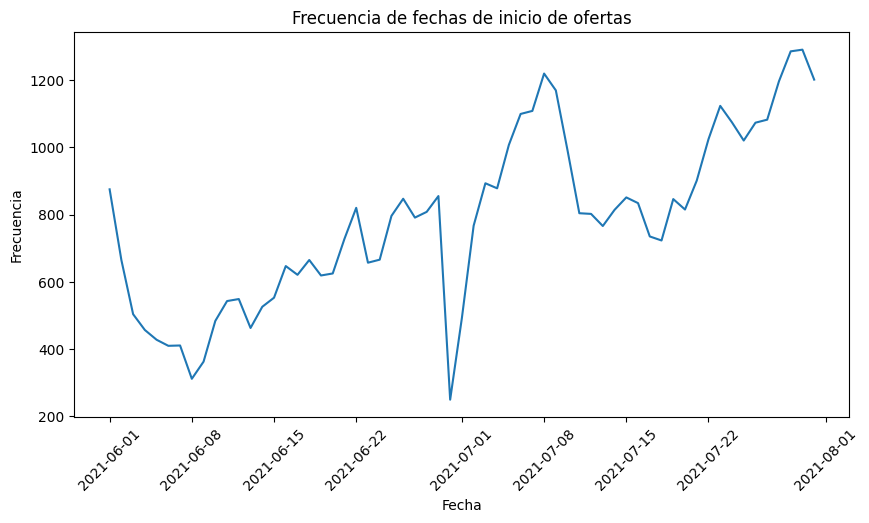

In [72]:
# Evaluar distribución de "OFFER_START_DATE"
plt.figure(figsize=(10,5))
plt.title("Frecuencia de fechas de inicio de ofertas")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
sns.lineplot(x=frec_offer_start_date.index, y=frec_offer_start_date.values);

# COMPLETAR ANALISIS!

**El gráfico indica una tendencia creciente en la segunda mitad de junio y a lo largo de julio.**

COMPLETAR!

In [53]:
# COMPARAR DIFERENCIAS ENTRE JUNIO Y JULIO!

### "OFFER_START_DTTM"

**La columna "OFFER_START_DTTM" parece ser la columna original, idéntica a "OFFER_START_DATE" pero con el horario (timestamp) incluído. Permitiría analizar las horas en las cuales se lanzan más ofertas.**

In [42]:
df[["OFFER_START_DATE", "OFFER_START_DTTM"]]

,OFFER_START_DATE,OFFER_START_DTTM
0,2021-06-22,2021-06-22 16:00:00+00:00
1,2021-06-22,2021-06-22 13:00:00+00:00
2,2021-06-22,2021-06-22 07:00:00+00:00
3,2021-06-22,2021-06-22 19:00:00+00:00
4,2021-06-22,2021-06-22 13:00:00+00:00
...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00
48742,2021-06-19,2021-06-19 13:00:00+00:00
48743,2021-06-19,2021-06-19 07:00:00+00:00
48744,2021-06-19,2021-06-19 13:00:00+00:00


**Se verifica que ambos campos sean iguales, exceptuando el horario, para confirmar que "OFFER_START_DATE" fue generado a partir de "OFFER_START_DTTM", y que no existan potenciales errores de typeo, en caso de venir de algún CRM o software similar.**

In [34]:
# Convertir columna "OFFER_START_DTTM" a tipo Datetime
df["OFFER_START_DTTM"] = pd.to_datetime(df["OFFER_START_DTTM"])

# Crear columna para verificación
df["OFFER_START_DTTM_DATE"] = df["OFFER_START_DTTM"].copy()

# Extraer fecha sin timestamp
df["OFFER_START_DTTM_DATE"] = df["OFFER_START_DTTM_DATE"].dt.date

# Verificar
df["OFFER_START_DTTM_DATE"].head(3)

0    2021-06-22
1    2021-06-22
2    2021-06-22
Name: OFFER_START_DTTM_DATE, dtype: object

In [51]:
# Evaluar si existen diferencias
(pd.to_datetime(df["OFFER_START_DATE"]) != df["OFFER_START_DTTM_DATE"]).any()

False

In [52]:
# Imprimir columnas
print(df.columns)

# Droppear columna adicional
df.drop(columns="OFFER_START_DTTM_DATE", inplace=True)

# Verificar
df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_START_DTTM_DATE'],
      dtype='object')


Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

**Debido a que el campo es exactamente igual a "OFFER_START_DATE", se creará un campo para evaluar posteriormente los horarios donde se publican las ofertas.**

**Se extrae exclusivamente la hora, ya que los minutos agregarían más granularidad innecesaria, generando 60 categorías adicionales (0 a 59), mientras que con las horas, existen 24 categorías (0 a 23).**

**Extraer el horario permitiría entender si hay más ofertas a la mañana, a la tarde o a la noche, además de horarios populares, para entender patrones.**

**Posteriormente sería interesante entender en qué horarios se vende más, para recomendar lanzar más campañas en esos horarios.**

In [60]:
# Crear columna con timestamp
df["OFFER_START_DTTM_H"] = df["OFFER_START_DTTM"].copy()
df["OFFER_START_DTTM_H"] = df["OFFER_START_DTTM_H"].dt.hour

# Verificar
df["OFFER_START_DTTM_H"].head(3)

0    16
1    13
2     7
Name: OFFER_START_DTTM_H, dtype: int32

In [62]:
# Cantidad de horarios en la columna
df["OFFER_START_DTTM_H"].nunique()

24

In [63]:
# Evaluar horarios más populares
frec_offer_start_h = df["OFFER_START_DTTM_H"].value_counts()
frec_offer_start_h

OFFER_START_DTTM_H
13    14103
19    12725
7     12367
12     2127
17     1308
11     1230
15     1166
14      939
16      786
10      375
18      314
20      105
9        79
8        53
1        52
21       41
22       18
6        10
3         8
2         7
23        4
0         1
5         1
4         1
Name: count, dtype: int64

**Se puede observar que los 3 horarios más populares son a las 13hs, 19hs y 7hs.**

**Esto se puede deber potencialmente a que el horario del almuerzo le da mayor libertad a los clientes y les permite navegar, ver ofertas, y comprar, por lo tanto, las ofertas relámpago apuntan a este horario.**

**A las 19hs, las ofertas apuntan a los clientes que salen de la jornada laboral o estudiantil, mientras que a las 7hs se pueden lanzar ofertas que apunten a usuarios que estén desayunando o se estén desplazando al trabajo, universidad o colegio, mientras revisan celular o la computadora.**

**Los horarios menos populares son a la noche tarde o a la madrugada, entre las 20 y 6hs, donde es racional estimar una actividad baja por parte de los usuarios, ya que seguramente se encuentren cenando o durmiendo.**

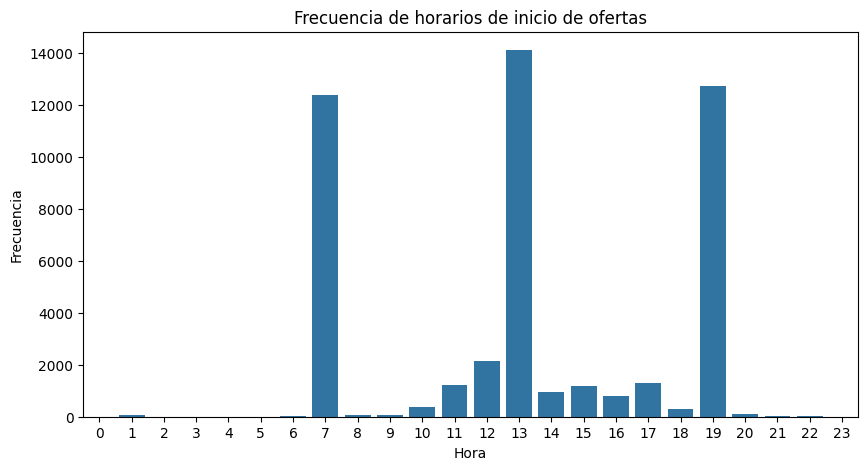

In [73]:
# Evaluar distribución de "OFFER_START_DTTM_H"
plt.figure(figsize=(10,5))
plt.title("Frecuencia de horarios de inicio de ofertas")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
sns.barplot(x=frec_offer_start_h.index, y=frec_offer_start_h.values);

**El gráfico expone y apoya lo discutido anteriormente, sobre los picos de lanzamiento de ofertas a la mañana, mediodía y noche (7, 13 y 19hs), y demuestra de forma visual los horarios menos populares para ofrecer ofertas (entre las 20 y 6hs).**

# VER DIFERENCIAS DE HORARIOS ENTRE JUNIO Y JULIO, POR VACACIONES!

### "OFFER_FINISH_DTTM"

# EVALUAR FECHAS, Y LUEGO HORARIOS, LUEGO EVALUAR COMPARAR CON VENTAS EN OTRA SECCION!

### "OFFER_TYPE"

In [81]:
df["OFFER_TYPE"].value_counts()

OFFER_TYPE
lightning_deal    47820
Name: count, dtype: int64

**La columna "OFFER_TYPE" contiene solamente el valor "lightning_deal", también conocido como oférta relámpago. Posiblemente este valor haya ayudado a extraer esta muestra de una base de datos más aplia, junto con el rango de tiempo.**

**En este dataset, esta columna con un solo dato no aportaría valor para un modelo de Machine Learning y se droppearía o ignoraría.**

### "INVOLVED_STOCK"

**La columna "INVOLVED_STOCK" indica la cantidad de unidades (en integers) que el producto en la oferta relámpago tiene disponible para este tipo de oferta.**

**Sería interesante entender si la cantidad de unidades disponible influye en el comportamiento de los clientes a la hora de comprar, en el caso de que una oferta al tener una menor cantidad de unidades disponibles, genere cierta sensación de urgencia en el usuario y lo empuje a comprar.**

In [109]:
frec_involved_stock = df["INVOLVED_STOCK"].value_counts(dropna=False)
frec_involved_stock

INVOLVED_STOCK
5      17868
15     16676
10      3198
20       784
8        569
       ...  
165        1
599        1
699        1
675        1
436        1
Name: count, Length: 505, dtype: int64

In [83]:
df["INVOLVED_STOCK"].nunique()

505

In [118]:
# Filtrar por cantidad de unidades que ocurran por lo menos 30 veces, para poder visualizar en el gráfico
umbral = 30
frec_involved_stock_umbral = frec_involved_stock[frec_involved_stock >= umbral]

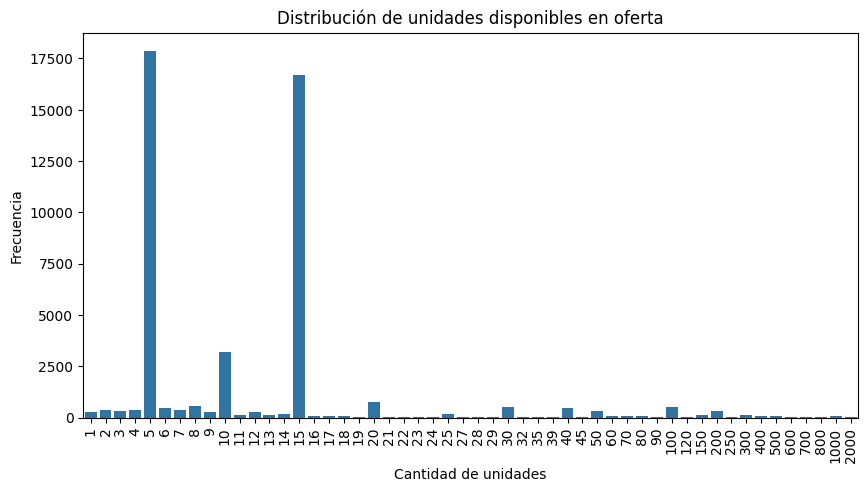

In [119]:
# Graficar distribución de "INVOLVED_STOCK"
plt.figure(figsize=(10,5))
plt.title("Distribución de unidades disponibles en oferta")
plt.xlabel("Cantidad de unidades")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
sns.barplot(x=frec_involved_stock_umbral.index, y=frec_involved_stock_umbral.values);

**Los picos están en 5 y 15 unidades, seguidos de 10 unidades, con una diferencia bastante significativa. Esto podría indicar que es frecuente cargar una cantidad de unidades que sean múltiplos de 5, en ofertas relámpago.**

**Habría que investigarlo, pero es posible que sea una estrategia comercial para simplificar compras, al tratar de incentivar compras en packs o conjuntos de 5, 10 o 15 unidades. Además, es posible que estas ofertas sean por volumen.**

**Por otro lado, hay muchos valores extremos (de unidades) con bajas frecuencias. Al tener frecuencias muy bajas, son casos extremos aislados, que dificultaron la visualización, por lo tanto se tuvo que fijar un umbral en la frecuencia por cada valor en la cantidad de unidades, en 30.**

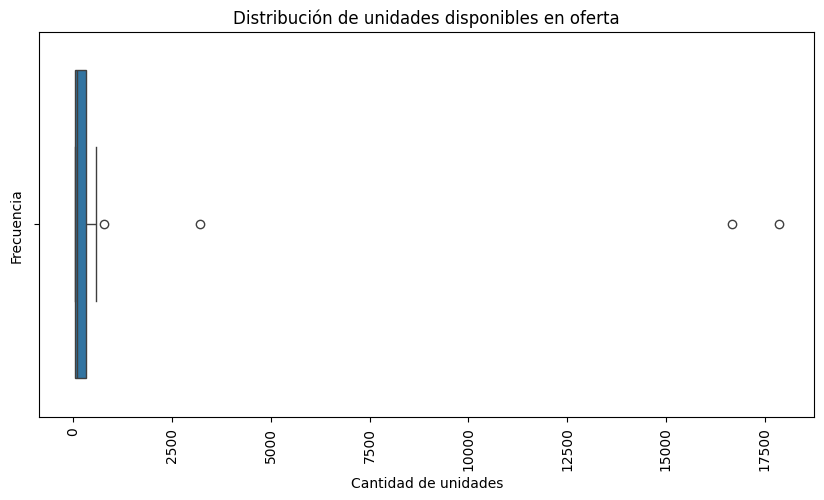

In [126]:
# Observar outliers
plt.figure(figsize=(10,5))
plt.title("Distribución de unidades disponibles en oferta")
plt.xlabel("Cantidad de unidades")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
sns.boxplot(x=frec_involved_stock_umbral);

**El boxplot refuerza el concepto de que hay una cantidad de outliers en términos de cantidades de unidades. Es posible que en muchos casos se trate de error de typeo, o una apuesta masiva a la venta de alguna oferta durante la época de vacaciones de invierno.**

In [130]:
# Observar estadísticas descriptivas
involved_stock_estadisticas = df["INVOLVED_STOCK"].describe()
involved_stock_estadisticas

count    47820.000000
mean        35.153095
std        208.339376
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max       9000.000000
Name: INVOLVED_STOCK, dtype: float64

**Se puede observar que en términos de stock, la media es de aproximadamente 35, mientras que el Q1, la mediana y el Q3 son de 5, 10 y 15 unidades respectivamente, los picos, reforzando el concepto que la media está influenciada por los outliers en términos de stock.** 

In [134]:
# Calcular rango intercuartil
iqr_involved_stock = involved_stock_estadisticas.loc["75%"] - involved_stock_estadisticas.loc["25%"]

# Calcular punto de corte superior para outliers
punto_corte_superior_involved_stock = involved_stock_estadisticas.loc["75%"] + iqr_involved_stock * 1.5

# Calcular punto de corte inferior para outliers
punto_corte_inferior_involved_stock = involved_stock_estadisticas.loc["25%"] - iqr_involved_stock * 1.5

# Imprimir rango intercuartil y punto de corte superior e inferior
print(f"Rango intercuartil: {iqr_involved_stock:.2f}")
print(f"Punto de corte superior para outliers: {punto_corte_superior_involved_stock:.2f}")
print(f"Punto de corte inferior para outliers: {punto_corte_inferior_involved_stock:.2f}")

Rango intercuartil: 10.00
Punto de corte superior para outliers: 30.00
Punto de corte inferior para outliers: -10.00


**Se puede observar que el stock a partir de las 30 unidades por oferta relámpago es considerado un valor extremo.**

### "REMAINING_STOCK_AFTER_END"

In [138]:
df["REMAINING_STOCK_AFTER_END"].value_counts()

REMAINING_STOCK_AFTER_END
5       9666
15      7010
4       3673
0       2961
14      2750
        ... 
853        1
1459       1
220        1
3918       1
1730       1
Name: count, Length: 801, dtype: int64

### "SOLD_AMOUNT"

### "SOLD_QUANTITY"

### "ORIGIN"

### "SHIPPING_PAYMENT_TYPE"

### "DOM_DOMAIN_AGG1"

### "VERTICAL"

### "DOMAIN_ID"

In [35]:
# Comparar diferencias de ventas entre junio y julio

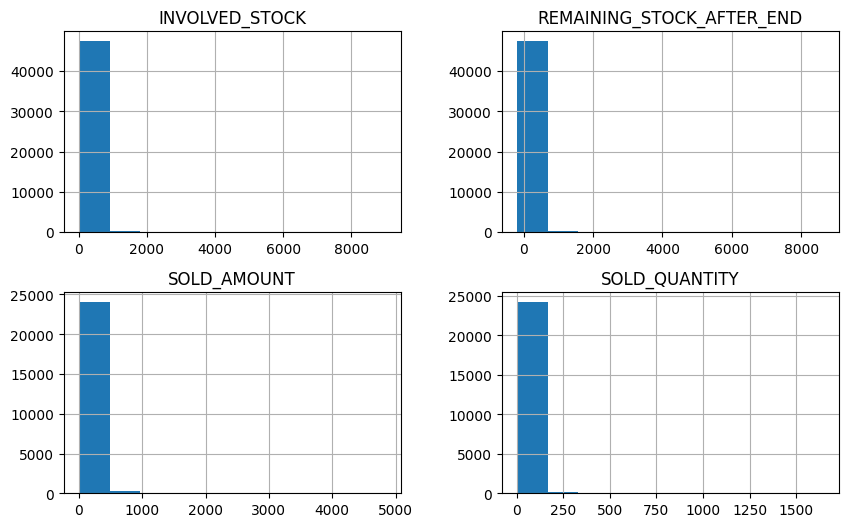

In [51]:
# Histogramas de variables numéricas
df.hist(figsize=(10,6));

In [53]:
# Evaluar variables categóricas
df.dtypes

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

* Revisar tipos de datos
* Evaluar casteos
* Armar countplots de variables categóricas y de torta
* Armar gráficos temporales
* Armar variables dummies

In [54]:
df["OFFER_START_DATE"]

0        2021-06-22
1        2021-06-22
2        2021-06-22
3        2021-06-22
4        2021-06-22
            ...    
48741    2021-06-19
48742    2021-06-19
48743    2021-06-19
48744    2021-06-19
48745    2021-06-19
Name: OFFER_START_DATE, Length: 47820, dtype: object

array([[<Axes: title={'center': 'INVOLVED_STOCK'}>,
        <Axes: title={'center': 'REMAINING_STOCK_AFTER_END'}>],
       [<Axes: title={'center': 'SOLD_AMOUNT'}>,
        <Axes: title={'center': 'SOLD_QUANTITY'}>]], dtype=object)

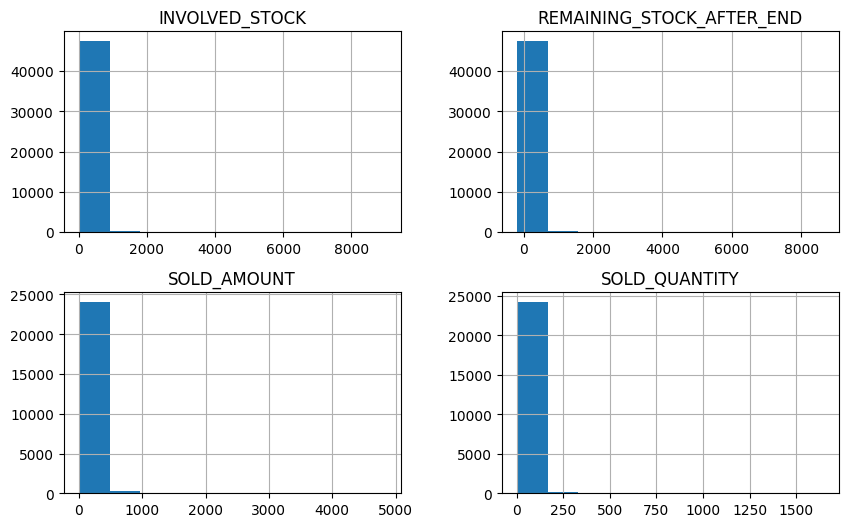

## Evaluar outliers

## Evaluar correlaciones

In [19]:
# Evaluar correlaciones de atributos numéricos
df_numeric = df.select_dtypes(include=["float64", "int64"])
df_numeric_corr = df_numeric.corr()
df_numeric_corr

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
INVOLVED_STOCK,1.000000,0.994240,0.405859,0.557684
REMAINING_STOCK_AFTER_END,0.994240,1.000000,0.354320,0.484031
SOLD_AMOUNT,0.405859,0.354320,1.000000,0.708884
SOLD_QUANTITY,0.557684,0.484031,0.708884,1.000000


''

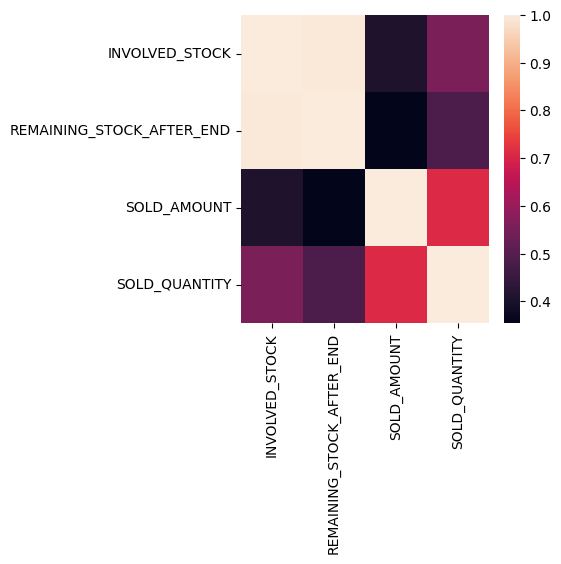

In [56]:
plt.figure(figsize=(4, 4))
sns.heatmap(df_numeric_corr)
;

# Conclusiones